In [3]:
import pandas as pd
import numpy as np
import xlwings as xw
import datetime as dt

In [2]:
df = pd.DataFrame(data=np.random.randn(100, 5),
                  columns=[f"Trial{i}" for i in range(1, 6)])
df.head()

,Trial1,Trial2,Trial3,Trial4,Trial5
0,0.613029,-0.709623,0.079888,0.052574,0.919275
1,-0.471089,0.828345,1.126787,-0.724273,0.025305
2,0.955895,1.231486,-0.086140,-0.777691,0.117343
3,-1.072141,0.255823,1.981712,0.279765,-2.880319
4,0.389290,-0.118706,0.952180,0.594684,0.861016


In [3]:
# 在Excel中查看DataFrame数据
xw.view(df)

In [9]:
# 创建一个新的空工作簿并打印其名称
book = xw.Book()
book.name

'工作簿1'

In [10]:
# 访问工作表集合
book.sheets

Sheets([<Sheet [工作簿1]Sheet1>])

In [11]:
# 通过索引或者名称获取工作表对象
sheet1 = book.sheets[0]
sheet1

<Sheet [工作簿1]Sheet1>

In [12]:
sheet1 = book.sheets['Sheet1']
sheet1

<Sheet [工作簿1]Sheet1>

In [14]:
sheet1.range('A1').value

In [15]:
# 写入值
sheet1.range('A1').value = 'Hello World'
sheet1.range('A1').value

'Hello World'

In [16]:
# 写入数组
sheet1.range('A1').value = np.random.randn(5, 5)

In [18]:
# [0, 0]表示第一行第一列
book.sheets(0).range('A1:B2')[0, 0].value

0.8076891882012042

In [20]:
# 通过sheet索引访问B4
sheet1[3, 1].value

0.5961109198694295

In [22]:
# 通过range索引访问B4
sheet1.range((4, 2)).value

0.5961109198694295

In [26]:
# 通过sheet切片来访问A2:C3
sheet1[1:3, 0:3].value

[[-0.05001295664971908, -0.44165559163289325, -1.2071871396677831],
 [0.22931354821825464, -0.06067618766112328, 1.723477430590943]]

In [29]:
# 通过range切片来访问A2:C3，注意range的切片是从左到右的
# 传入的是A2和C3的索引
sheet1.range((2, 1), (3, 3)).value

[[-0.05001295664971908, -0.44165559163289325, -1.2071871396677831],
 [0.22931354821825464, -0.06067618766112328, 1.723477430590943]]

In [30]:
# 通过自底向上的方式得到app对象
# range->sheet->book->app
sheet1['A1'].sheet.book.app

<Excel App 6625>

In [31]:
# app的常见用例是在一个隐藏的Excel中打开工作簿，这样你就可以在后台运行xlwings脚本且不会弹出Excel窗口，并同时完成其他工作。
# 可以通过app.visible设置是否显示Excel窗口
visible_app = sheet1.book.app
invisible_app = xw.App(visible=False)
[book.name for book in visible_app.books]

['工作簿1']

In [32]:
[book.name for book in invisible_app.books]

['工作簿2']

In [33]:
# 显示app的进程id
xw.apps.keys()

[8973, 6625]

In [38]:
invisible_book = invisible_app.books[0]
invisible_book.sheets[0]['A1'].value = 'Created by an invisible app.'
invisible_book.save('./data/invisible_book.xlsx')
invisible_app.quit()

### 9.2.1 处理DataFrame

In [4]:
data = [['Mark', 55, 'Italy', 4.5, 'Europe'],
        ['John', 45, 'USA', 3.5, 'North America']]
df = pd.DataFrame(data=data,
                  columns=['name', 'age', 'country', 'score', 'continent'],
                  index=[1001, 1002])
df.index.name = 'user_id'
df.head()

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1002,John,45,USA,3.5,North America


In [5]:
# 创建App对象
import xlwings as xw

app_1 = xw.App(visible=False)
book_1 = app_1.books.add()
sheet_1 = book_1.sheets[0]
# 将DataFrame写入Excel
sheet_1['A2'].value = df

In [6]:
# 将DataFrame写入时，可以使用options参数指定写入的格式
sheet_1['A10'].options(header=False, index=False).value = df

In [10]:
# 使用expend来选取一块连续的单元格
df2 = sheet_1['A2'].expand().options(pd.DataFrame).value
df2

,name,age,country,score,continent
user_id,,,,,
1001.0,Mark,55.0,Italy,4.5,Europe
1002.0,John,45.0,USA,3.5,North America


In [11]:
# 如果需要整型索引，可以修改其数据类型
df2.index = df2.index.astype(int)

In [12]:
df2

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1002,John,45.0,USA,3.5,North America


In [13]:
# 通过设置index=False，Excel文件中的所有值都会被保存到DataFrame的数据部分并且使用默认索引
sheet_1['A2'].expand().options(pd.DataFrame, index=False).value
# 索引成为了数据的一部分

# xlwings range对象的options方法修改的是读写Excel文件时处理值的方式
# 只有在调用range对象的value属性时，options才会进行求值

,user_id,name,age,country,score,continent
0,1001.0,Mark,55.0,Italy,4.5,Europe
1,1002.0,John,45.0,USA,3.5,North America


In [14]:
# ndim
# 水平区域（一维）
sheet_1['A1:B1'].value

[None, None]

In [15]:
# 垂直区域（一维）
sheet_1['A1:A2'].value

[None, 'user_id']

In [16]:
# 水平区域（二维），强制转换为二维区域
sheet_1['A1:B1'].options(ndim=2).value

[[None, None]]

In [17]:
# 使用np.array也可以转换，产生一个水平区域的一维数组
sheet_1['A1:B1'].options(np.array).value

array([nan, nan])

In [18]:
sheet_1['A1:A2'].options(np.array).value

array(['nan', 'user_id'], dtype='<U32')

In [22]:
# 如果需要垂直写入列表，那么此时可以使用transpose选项
sheet_1['D1'].options(tranpose=True).value = [300, 200]

In [23]:
# 写入一些示例数据
sheet_1['A13'].value = [dt.date(2022, 6, 16), None, 1.0]

In [24]:
sheet_1['A13:C13'].value

[datetime.datetime(2022, 6, 16, 0, 0), None, 1.0]

In [25]:
# 使用非默认选项读取
sheet_1['A13:C13'].options(empty='NA', dates=dt.date, numbers=int).value

[datetime.date(2022, 6, 16), 'NA', 1]

### 9.2.3 图表、图片和以定义的名称

In [26]:
xw.__version__

'0.24.6'

#### 图表

In [30]:
sheet_1['A15'].value = [[None, 'North', 'South'],
                        ['Last Year', 2, 5],
                        ['This Year', 3, 6]]

In [28]:
chart = sheet_1.charts.add(top=sheet_1['A19'].top,
                           left=sheet_1['A19'].left)

In [31]:
chart.chart_type = 'column_clustered'
chart.set_source_data(sheet_1['A15'].expand())

#### 图片

In [32]:
# 使用matplotlib生成图片，并放置到Excel中
df = sheet_1['A15'].expand().options(pd.DataFrame).value
df

,North,South
Last Year,2.0,5.0
This Year,3.0,6.0


In [33]:
% matplotlib inline
import matplotlib.pyplot as plt

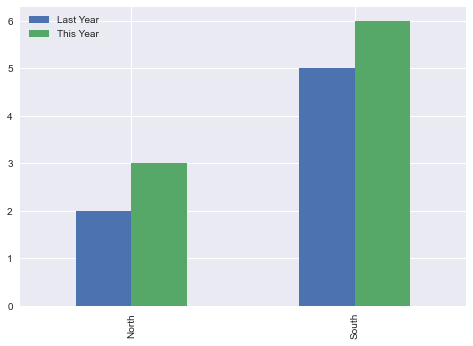

In [34]:
plt.style.use('seaborn')
ax = df.T.plot.bar()
fig = ax.get_figure()

In [35]:
# 将图片保存到Excel中
plot = sheet_1.pictures.add(fig, name='SalesPlot',
                            top=sheet_1['H19'].top,
                            left=sheet_1['H19'].left)
# 将图像大小缩小为70%
plot.width, plot.height = plot.width * 0.7, plot.height * 0.7

In [36]:
# 想要使用新的图像来更新图片，只需要调用update方法并传递另一个figure对象即可
# 虽然会替Excel中的图片，但会保留位置、尺寸、名称等属性
ax = (df + 1).T.plot.bar()
plot = plot.update(ax.get_figure())

#### 已定义名称

In [37]:
# 给一个具体区域定义名称，可以让代码更加灵活且更加稳定。
# 利用剧名区域读写值可以在不调整Python代码的情况下重新组织工作簿
# 即使由于插入单元格导致原来单元格的移动，也不会影响已定义的名称，对应的名称依然引用的是原来的单元格。

# 默认作用域是工作簿作用域
sheet_1['A1:B2'].name = 'matrix1'

In [38]:
sheet_1['B10:E11'].name = 'Sheet1!matrix2'

In [39]:
# 可以通过名称来获取区域
sheet_1['Sheet1!matrix1'].value

[[None, None], ['user_id', 'name']]

In [40]:
sheet_1['Sheet1!matrix2'].value

[[55.0, 'Italy', 4.5, 'Europe'], [45.0, 'USA', 3.5, 'North America']]

#### 9.2.4 案例研究

In [44]:
# 打开模板，粘贴数据，自动调整列并调整图表源，然后将其保存为不同名称的文件
template = xw.Book('./data/xl/sales_report_template.xlsx')
sheet = template.sheets['Sheet1']
sheet['B3'].value = 'summary'
sheet['B3'].expand().columns.autofit()
sheet.charts['Chart 1'].set_source_data(sheet['B3'].expand()[:-1, -1:])
template.save('./data/xl/sales_report_xlwings.xlsx')

In [55]:
# test
# 打开一个已有的工作表
template_1 = xw.Book('./data/xl/sales_report_template.xlsx')
# 使用工作表中的一个sheet页
sheet_1 = template_1.sheets[0]
# 设定标题
sheet_1['B3'].value = '汇总'
# 选定数据范围，通过expand()方法获取数据
sheet_1['B3'].expand().columns.autofit()
# 设置数据源
sheet_1.charts['Chart 1'].set_source_data(sheet_1['B3'].expand()[:-1, -1:])

# 增加一个图形
chart_1 = sheet_1.charts.add(top=sheet_1['L3'].top, left=sheet_1['L3'].left)
chart_1.chart_type = 'column_clustered'
chart_1.set_source_data(sheet_1.range('B3:H15'))

# 使用matplotlib绘图并保存至Excel中
df = sheet_1.range('B3:H15').options(pd.DataFrame).value
ax = df.plot.bar()
fig = ax.get_figure()
plot = sheet_1.pictures.add(fig, name='SalesPlot',
                            top=sheet_1['B45'].top,
                            left=sheet_1['B45'].left)

plot.width, plot.height = plot.width*2, plot.height

template_1.save('./data/xl/sales_report_xlwings_test.xlsx')

/Users/summer/.conda/envs/PythonEnv/lib/python3.9/site-packages/xlwings/utils.py:230: UserWarning: Glyph 27719 (\N{CJK UNIFIED IDEOGRAPH-6C47}) missing from current font.
  canvas.draw()
/Users/summer/.conda/envs/PythonEnv/lib/python3.9/site-packages/xlwings/utils.py:230: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from current font.
  canvas.draw()
/Users/summer/.conda/envs/PythonEnv/lib/python3.9/site-packages/xlwings/utils.py:231: UserWarning: Glyph 27719 (\N{CJK UNIFIED IDEOGRAPH-6C47}) missing from current font.
  image.savefig(filename, bbox_inches='tight', dpi=300)
/Users/summer/.conda/envs/PythonEnv/lib/python3.9/site-packages/xlwings/utils.py:231: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from current font.
  image.savefig(filename, bbox_inches='tight', dpi=300)
